In [135]:
import re 
import pandas as pd
import seaborn as sns


In [53]:
f= open('WhatsApp Chat with +91 95296 86186.txt',encoding='utf-8')

In [54]:
data=f.read()

# data collection

In [55]:
data

"01/01/24, 2:37\u202fpm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n01/01/24, 2:37\u202fpm - Shubh Shrishrimal: Aye aye captain\n01/01/24, 2:39\u202fpm - +91 95296 86186: 🙋🏼\u200d♀️\n01/01/24, 2:39\u202fpm - Shubh Shrishrimal: 🕺🏻\n01/01/24, 2:39\u202fpm - Shubh Shrishrimal: Nahi sudar ne wali\n01/01/24, 2:40\u202fpm - +91 95296 86186: 😂\n01/01/24, 2:40\u202fpm - Shubh Shrishrimal: WhatsApp PE toh sudar ja\n01/01/24, 2:40\u202fpm - +91 95296 86186: 😂\n01/01/24, 2:40\u202fpm - Shubh Shrishrimal: Nahi toh mark Zuckerberg ko call kar ke tere phone se hata deta hu👍🏻\n01/01/24, 2:40\u202fpm - +91 95296 86186: 👍🏻\n01/01/24, 2:41\u202fpm - +91 95296 86186: 😅😇\n01/01/24, 2:42\u202fpm - Shubh Shrishrimal: Narak se dar\n01/01/24, 2:45\u202fpm - +91 95296 86186: Mujhe kisi se nhi bas tujh se dar lagta hai\n01/01/24, 2:45\u202fpm - Shubh Shrishrimal: Aur mujhe pyar se\n01/01/24, 5:57\u202fpm - Shubh S

# data cleaning and feature extraction

In [56]:
pattern = r"(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2} [ap]m) - ([^:]+): (.*)"

In [57]:
matches = re.findall(pattern, data)

In [58]:
df = pd.DataFrame(matches, columns=['Date', 'Time', 'Sender', 'Message'])

In [59]:
df.sample(5)

,Date,Time,Sender,Message
2499,24/01/24,9:03 pm,+91 95296 86186,Hoo gaya
2831,27/01/24,8:56 am,Shubh Shrishrimal,Tujhe dekh kar 100 kg utha lunga ek haath sai
2940,28/01/24,12:21 am,Shubh Shrishrimal,Really i love you
1801,20/01/24,8:42 am,+91 95296 86186,Tu thik to hai na
201,03/01/24,8:01 pm,Shubh Shrishrimal,Sahi hai ho jayenga 2 hr mai


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3695 non-null   object
 1   Time     3695 non-null   object
 2   Sender   3695 non-null   object
 3   Message  3695 non-null   object
dtypes: object(4)
memory usage: 115.6+ KB


In [61]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %I:%M %p')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3695 non-null   object        
 1   Time      3695 non-null   object        
 2   Sender    3695 non-null   object        
 3   Message   3695 non-null   object        
 4   Datetime  3695 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 144.5+ KB


In [63]:
df['year']=df['Datetime'].dt.year

In [64]:
df['month']=df['Datetime'].dt.month_name()

In [65]:
df['day']=df['Datetime'].dt.day

In [66]:
df['hour']=df['Datetime'].dt.hour

In [67]:
df['minute']=df['Datetime'].dt.minute

In [68]:
df.head()

,Date,Time,Sender,Message,Datetime,year,month,day,hour,minute
0,01/01/24,2:37 pm,Shubh Shrishrimal,Aye aye captain,2024-01-01 14:37:00,2024,January,1,14,37
1,01/01/24,2:39 pm,+91 95296 86186,🙋🏼‍♀️,2024-01-01 14:39:00,2024,January,1,14,39
2,01/01/24,2:39 pm,Shubh Shrishrimal,🕺🏻,2024-01-01 14:39:00,2024,January,1,14,39
3,01/01/24,2:39 pm,Shubh Shrishrimal,Nahi sudar ne wali,2024-01-01 14:39:00,2024,January,1,14,39
4,01/01/24,2:40 pm,+91 95296 86186,😂,2024-01-01 14:40:00,2024,January,1,14,40


# msg analysis


In [69]:
words=[]
for message in df['Message']:
    words.extend(message.split())



In [70]:
df['Message'].count()

3695

In [71]:
len(words)

17726

In [72]:
x=df['Sender'].value_counts().head()

In [73]:
import matplotlib.pyplot as plt

In [74]:

name= x.index
count=x.values

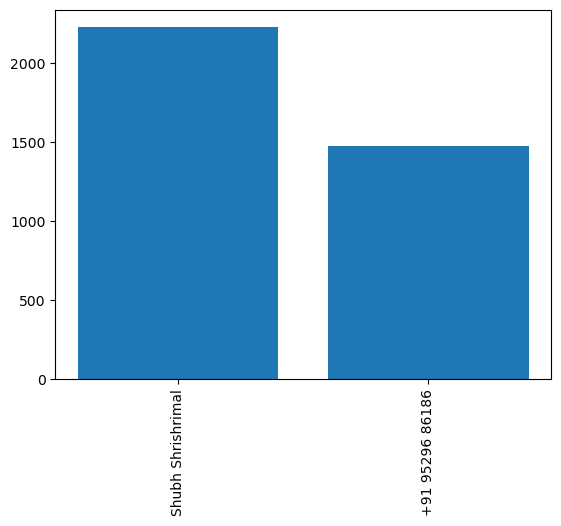

In [75]:

plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
round((df['Sender'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','Sender':'percent'})


,percent,count
0,Shubh Shrishrimal,60.19
1,+91 95296 86186,39.81


In [77]:
temp=df[df['Message']!='<Media omitted>']


In [78]:
temp=temp[temp['Message']!='<This message was edited>']

# stop wordremoval hinglish

In [79]:
import re
with open('stop_hinglish.txt', 'r') as file:
    hinglish_stop_words = file.read()

In [80]:
stop_words_list = re.split(r'\n', hinglish_stop_words)

In [81]:
stop_words_list.append

<function list.append(object, /)>

In [82]:
words=[]
for message in temp['Message']:
    for word in message.lower().split():
        if word not in stop_words_list:
            words.append(word)

In [83]:
words

['captain',
 '🙋🏼\u200d♀️',
 '🕺🏻',
 'sudar',
 '😂',
 'whatsapp',
 'sudar',
 '😂',
 'mark',
 'zuckerberg',
 'call',
 'phone',
 'hata',
 'deta',
 'hu👍🏻',
 '👍🏻',
 '😅😇',
 'narak',
 'dar',
 'tujh',
 'dar',
 'pyar',
 'let’s',
 'listen',
 'choose',
 'music',
 'real',
 'time.',
 'play',
 'neend',
 'aarhi',
 'min',
 'call',
 'wait',
 'lenge',
 'songs',
 'ha',
 'sogaya',
 'dabha',
 'ruke',
 'uth',
 'null',
 'bhul',
 'wife',
 'bhul',
 'aagye',
 'lock',
 'diya😂',
 '<this',
 'message',
 'edited>',
 'kya??',
 'neend',
 'type',
 'kya,😂',
 'chhod',
 'kharab',
 'joke',
 'jam',
 'jam',
 'laga',
 'haa',
 'let’s',
 'listen',
 'choose',
 'music',
 'real',
 'time.',
 '🤦🏼\u200d♀️',
 'baja',
 'driver',
 'vibe',
 'e',
 'choice',
 'doubt',
 'yaar',
 'tareef',
 'yar',
 'khus',
 'samjha',
 'sach',
 'yaar',
 '😭',
 'haa',
 'gana',
 'baja',
 'walo',
 'chala',
 'ladki',
 'shubh',
 'liye😂',
 'baja*',
 'hoga🤣',
 '🤦🏼\u200d♀️',
 'bhjan',
 'laga',
 'impression',
 'padega',
 'banan',
 'impression',
 '🥲',
 'bahu',
 'banana',
 

In [84]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,haa,280
1,call,140
2,ha,111
3,message,97
4,baat,84
5,<this,80
6,edited>,80
7,ta,62
8,null,59
9,kha,56


# emoji analyser

In [85]:
!pip install emoji


In [86]:
import emoji

emojis = []
for message in temp['Message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

print(emojis)


['🙋', '🏼', '♀', '🕺', '🏻', '😂', '😂', '👍', '🏻', '👍', '🏻', '😅', '😇', '😂', '😂', '🤦', '🏼', '♀', '😭', '😂', '🤣', '🤦', '🏼', '♀', '🥲', '🤣', '👍', '🏻', '😅', '🤌', '🏻', '🥲', '😊', '😀', '🥲', '👍', '🏻', '😀', '👍', '🏻', '😭', '🤣', '🤣', '🤣', '😂', '😭', '😭', '😶', '👍', '🏻', '😂', '😅', '😭', '😵', '👍', '🎉', '🤣', '🤣', '😭', '🤣', '🤌', '🏻', '🍕', '👍', '🏻', '🥲', '👍', '🏻', '😅', '😭', '😒', '👍', '🏻', '😅', '👍', '🏻', '😭', '🤍', '💜', '👍', '🏻', '😅', '🤣', '👍', '🏻', '😭', '👍', '🏻', '🤣', '🤍', '💜', '🤞', '🏻', '😭', '🚬', '🤣', '😭', '😂', '🤣', '🤣', '👍', '🏻', '😂', '🤣', '😂', '🙂', '🍻', '🤣', '👍', '🏻', '🤣', '😂', '😭', '🤣', '🤣', '🥲', '💜', '😁', '🤣', '🥹', '👍', '🏻', '😍', '😵', '😵', '😵', '😂', '👍', '🏻', '🤣', '🥹', '💜', '🤣', '🤣', '😂', '💜', '🥲', '🥹', '🤣', '😂', '😥', '👍', '🏻', '🤣', '🥲', '😂', '🤣', '💜', '🤣', '😭', '🤣', '😭', '😭', '💜', '😭', '🎉', '🎉', '😅', '😭', '💜', '👍', '🏻', '🥲', '🤍', '🥲', '🫡', '🤣', '🤣', '👍', '🏻', '🤣', '🤣', '😭', '👍', '🏻', '👍', '🏻', '🤞', '🏻', '👍', '🏻', '💜', '🤣', '👀', '😬', '🤣', '🤣', '🔪', '🗿', '💀', '😂', '💀', '😅', '👍', '🏻', '👍', '🏻', '👍', '🏻', '👍',

In [87]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🏻,180
1,👍,151
2,🤣,50
3,😭,39
4,😂,29
5,🙏,19
6,💜,16
7,🥲,11
8,😅,10
9,💀,8


In [88]:
 df.head()

,Date,Time,Sender,Message,Datetime,year,month,day,hour,minute
0,01/01/24,2:37 pm,Shubh Shrishrimal,Aye aye captain,2024-01-01 14:37:00,2024,January,1,14,37
1,01/01/24,2:39 pm,+91 95296 86186,🙋🏼‍♀️,2024-01-01 14:39:00,2024,January,1,14,39
2,01/01/24,2:39 pm,Shubh Shrishrimal,🕺🏻,2024-01-01 14:39:00,2024,January,1,14,39
3,01/01/24,2:39 pm,Shubh Shrishrimal,Nahi sudar ne wali,2024-01-01 14:39:00,2024,January,1,14,39
4,01/01/24,2:40 pm,+91 95296 86186,😂,2024-01-01 14:40:00,2024,January,1,14,40


# Time analysis

In [89]:
df['month_num']=df['Datetime'].dt.month

In [90]:
timeline=df.groupby(['year','month_num','month']).count()['Message'].reset_index()

In [91]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))
    

In [92]:
timeline['time']=time

([0, 1], [Text(0, 0, 'January-2024'), Text(1, 0, 'February-2024')])

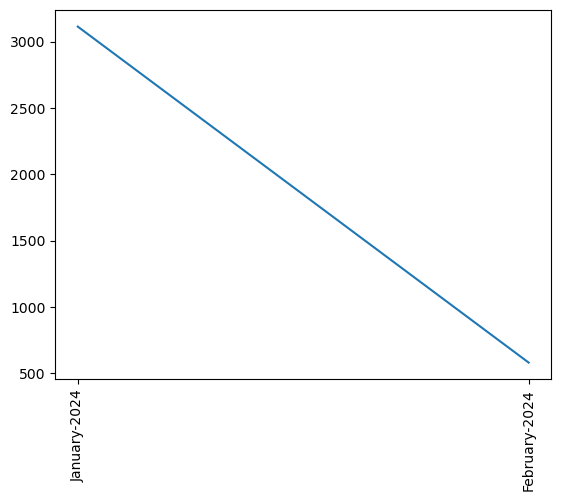

In [93]:
plt.plot(timeline['time'],timeline['Message'])
plt.xticks(rotation='vertical')

In [104]:
daily_time=df.groupby('Date').count()['Message'].reset_index()
daily_time

,Date,Message
0,01/01/24,85
1,01/02/24,39
2,02/01/24,46
3,02/02/24,20
4,03/01/24,99
5,04/01/24,104
6,05/01/24,31
7,06/01/24,58
8,06/02/24,10
9,07/01/24,4


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '01/01/24'),
  Text(1, 0, '01/02/24'),
  Text(2, 0, '02/01/24'),
  Text(3, 0, '02/02/24'),
  Text(4, 0, '03/01/24'),
  Text(5, 0, '04/01/24'),
  Text(6, 0, '05/01/24'),
  Text(7, 0, '06/01/24'),
  Text(8, 0, '06/02/24'),
  Text(9, 0, '07/01/24'),
  Text(10, 0, '07/02/24'),
  Text(11, 0, '08/01/24'),
  Text(12, 0, '09/01/24'),
  Text(13, 0, '10/01/24'),
  Text(14, 0, '11/01/24'),
  Text(15, 0, '12/01/24'),
  Text(16, 0, '13/01/24'),
  Text(17, 0, '14/01/24'),
  Text(18, 0, '15/01/24'),
  Text(19, 0, '16/01/24'),
  Text(20, 0, '17/01/24'),
  Text(21, 0, '18/01/24'),
  Text(22, 0, '19/01/24'),
  Text(23, 0, '20/01/24'),
  Text(24, 0, '21/01/24'),
  Text(25, 0, '22/01/24'),
  Text(26, 0, '23/01/24'),
  Text(27, 0, '24/01/24'),
  Text(28, 0, '25/01/24'),
  Text(29, 0, '26/01/24'),

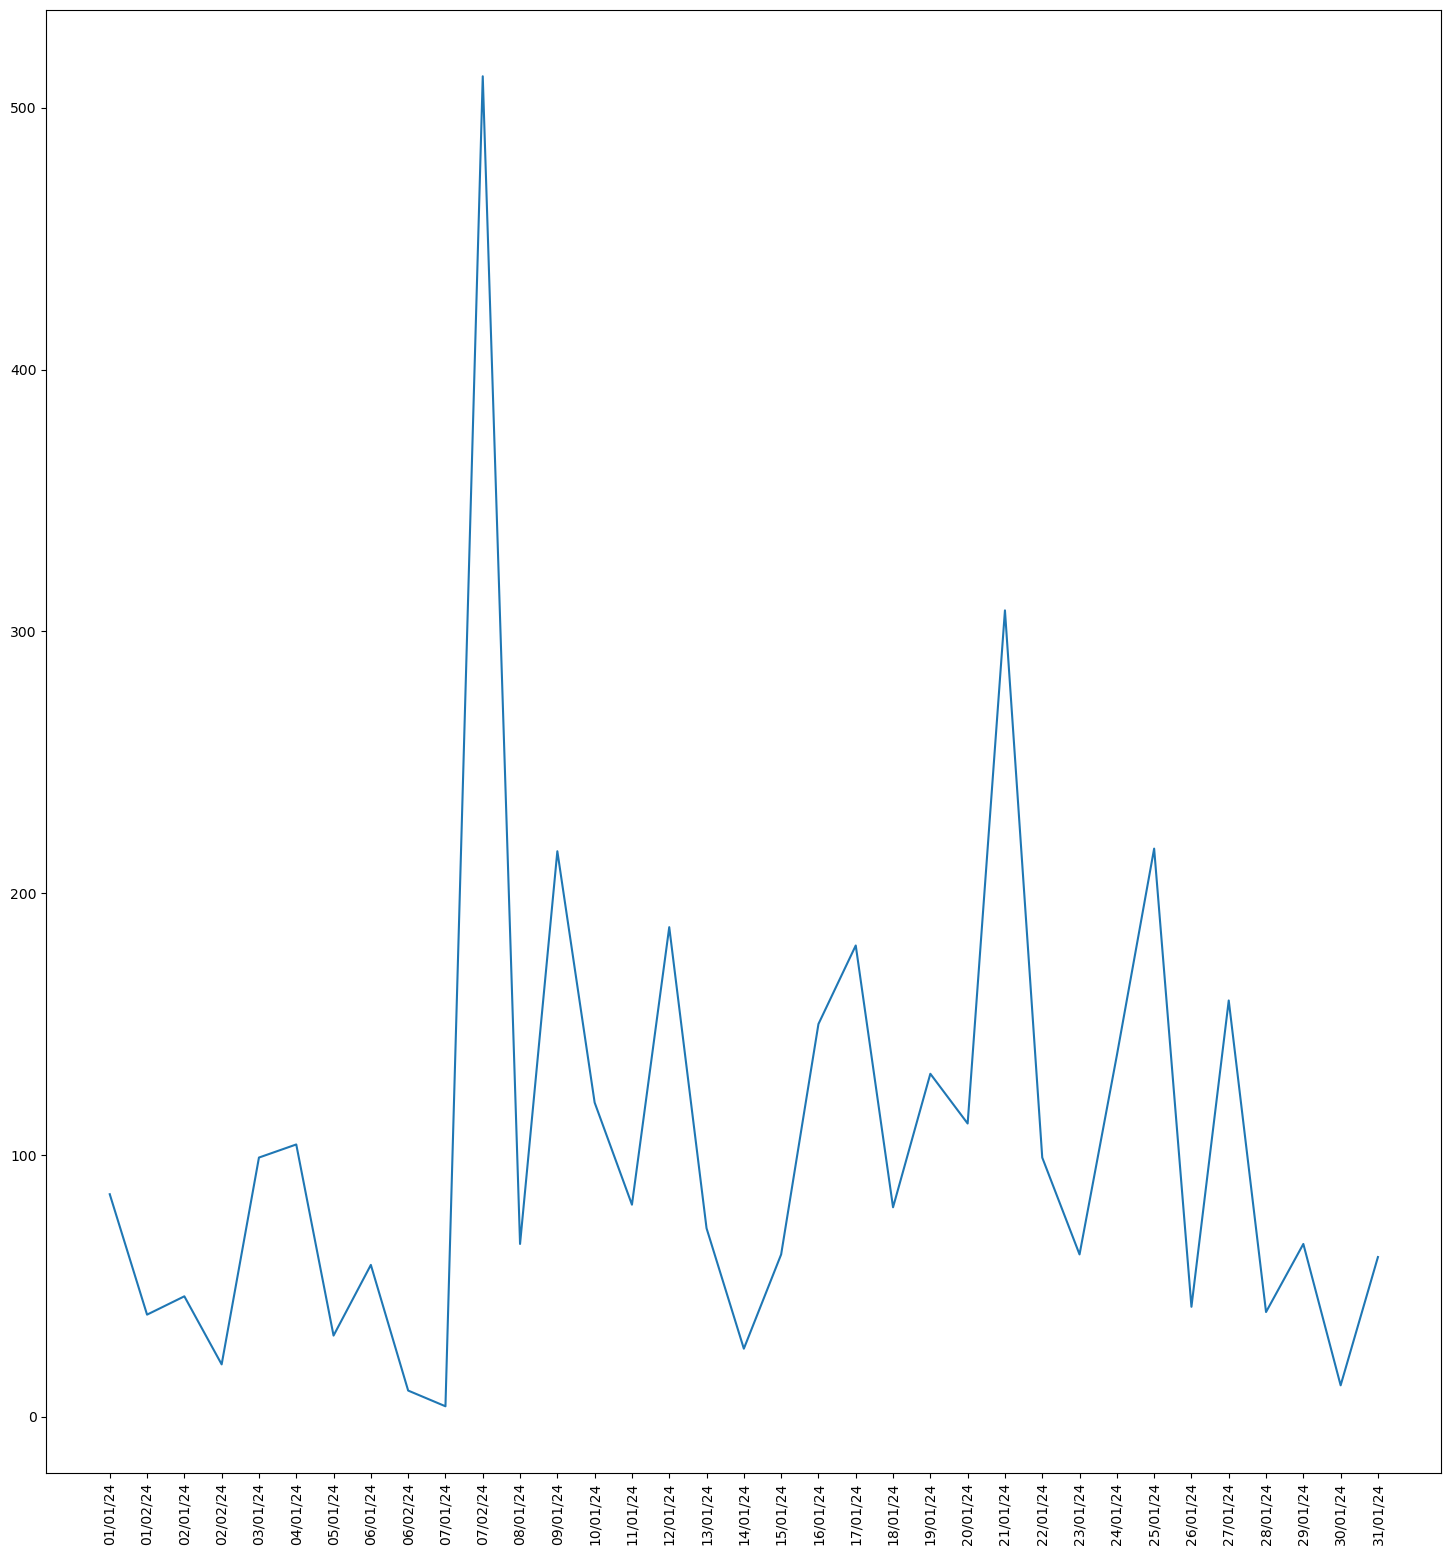

In [100]:
plt.figure(figsize=(18,19))
plt.plot(daily_time['Date'],daily_time['Message'])
plt.xticks(rotation='vertical')

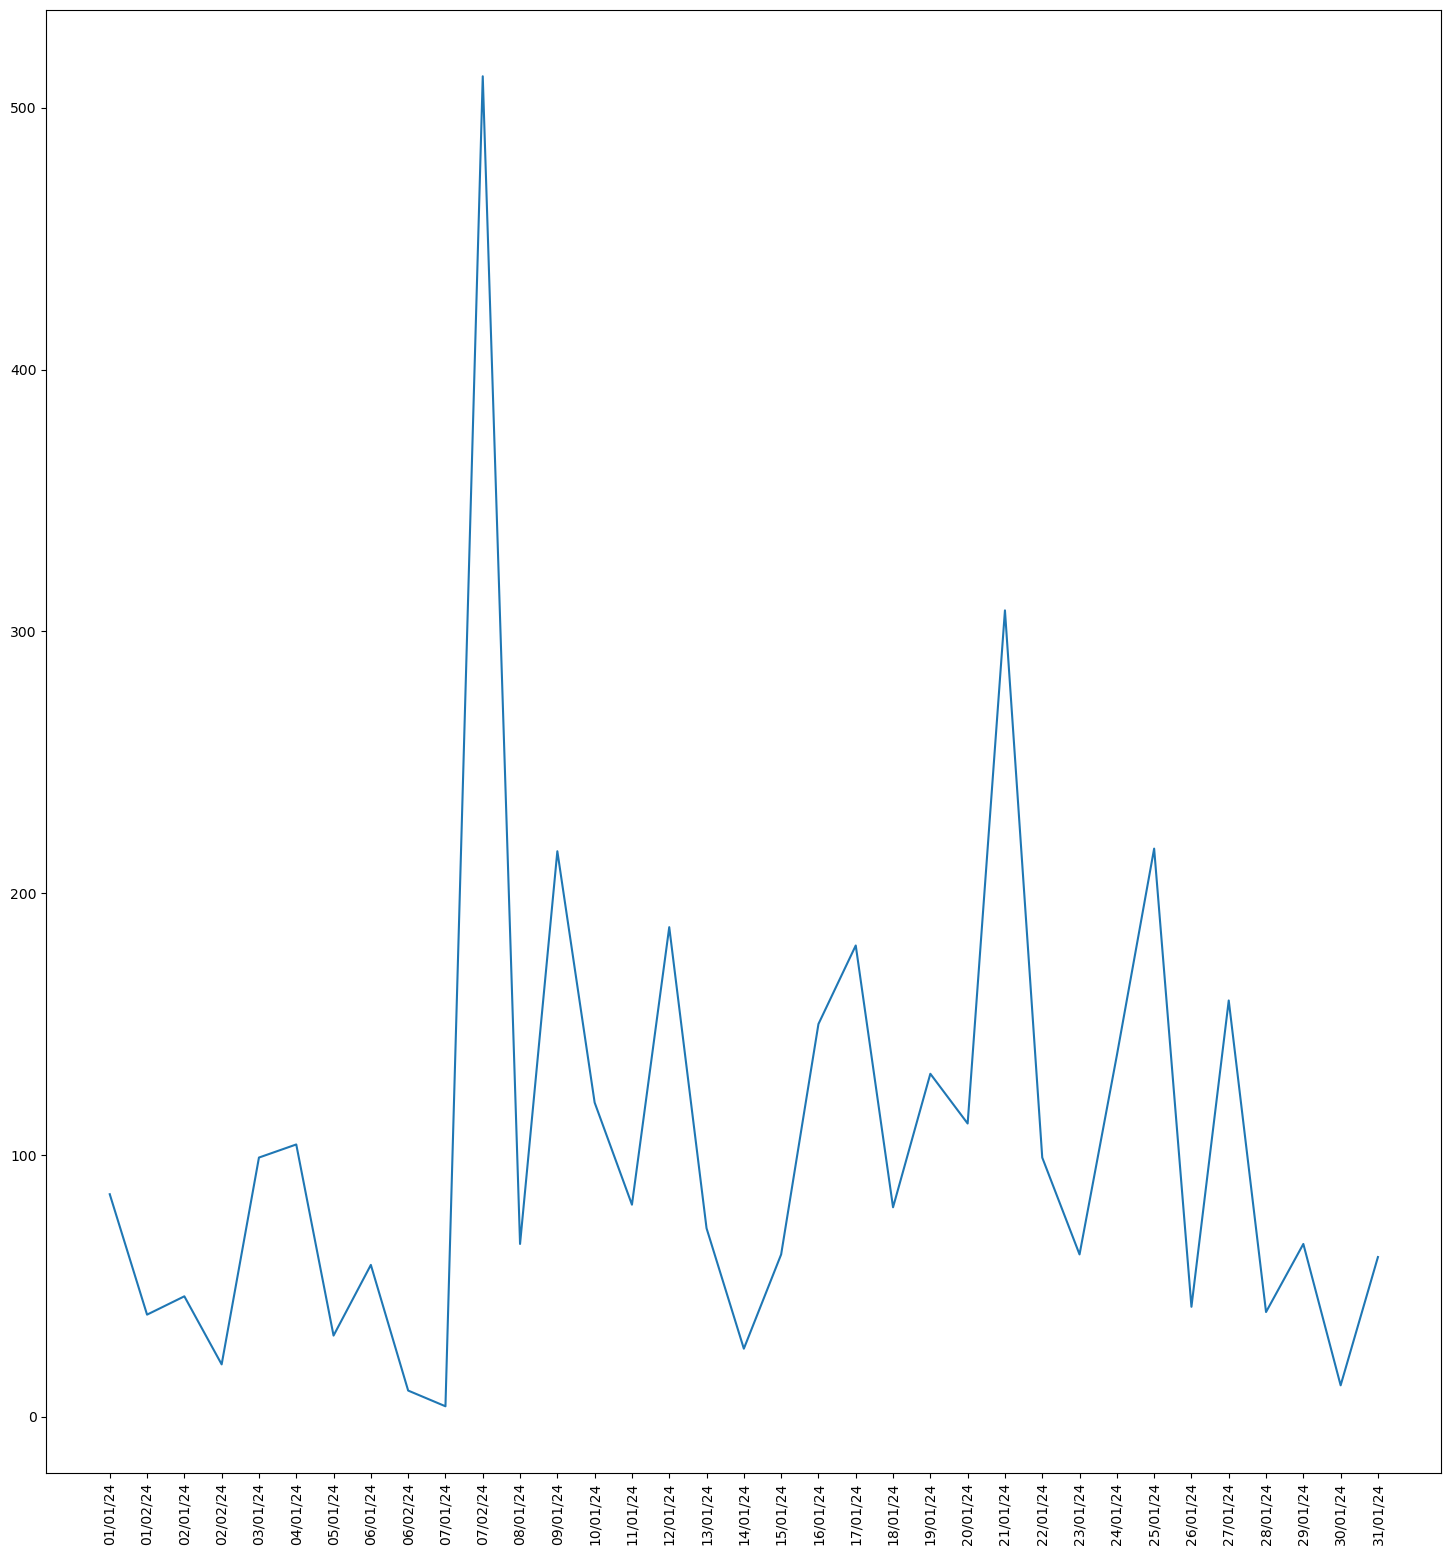

In [103]:
plt.figure(figsize=(18,19))
plt.plot(daily_time['Date'],daily_time['Message'])
plt.xticks(rotation='vertical')
plt.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3695 non-null   object        
 1   Time       3695 non-null   object        
 2   Sender     3695 non-null   object        
 3   Message    3695 non-null   object        
 4   Datetime   3695 non-null   datetime64[ns]
 5   year       3695 non-null   int32         
 6   month      3695 non-null   object        
 7   day        3695 non-null   int32         
 8   hour       3695 non-null   int32         
 9   minute     3695 non-null   int32         
 10  month_num  3695 non-null   int32         
 11  week_name  3695 non-null   object        
dtypes: datetime64[ns](1), int32(5), object(6)
memory usage: 274.4+ KB


In [118]:
df['week_name']=df['Datetime'].dt.day_name()

In [122]:
week_data=df.groupby('week_name').count()['Message'].reset_index()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

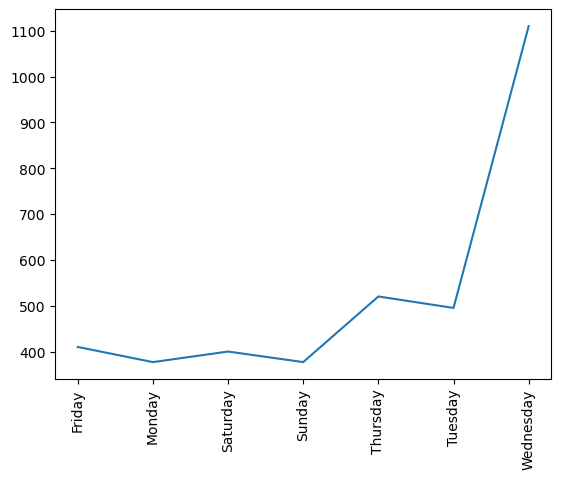

In [123]:
plt.plot(week_data['week_name'],week_data['Message'])
plt.xticks(rotation='vertical')

In [124]:
df['month'].value_counts().reset_index()

,month,count
0,January,3114
1,February,581


In [126]:
df

,Date,Time,Sender,Message,Datetime,year,month,day,hour,minute,month_num,week_name
0,01/01/24,2:37 pm,Shubh Shrishrimal,Aye aye captain,2024-01-01 14:37:00,2024,January,1,14,37,1,Monday
1,01/01/24,2:39 pm,+91 95296 86186,🙋🏼‍♀️,2024-01-01 14:39:00,2024,January,1,14,39,1,Monday
2,01/01/24,2:39 pm,Shubh Shrishrimal,🕺🏻,2024-01-01 14:39:00,2024,January,1,14,39,1,Monday
3,01/01/24,2:39 pm,Shubh Shrishrimal,Nahi sudar ne wali,2024-01-01 14:39:00,2024,January,1,14,39,1,Monday
4,01/01/24,2:40 pm,+91 95296 86186,😂,2024-01-01 14:40:00,2024,January,1,14,40,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
3690,07/02/24,6:40 pm,+91 95296 86186,Tu bhi apna dhyan rakhna,2024-02-07 18:40:00,2024,February,7,18,40,2,Wednesday
3691,07/02/24,6:40 pm,+91 95296 86186,Haa,2024-02-07 18:40:00,2024,February,7,18,40,2,Wednesday
3692,07/02/24,6:40 pm,Shubh Shrishrimal,Hata nahi chata par thik,2024-02-07 18:40:00,2024,February,7,18,40,2,Wednesday
3693,07/02/24,6:44 pm,Shubh Shrishrimal,Bc ja kyu nai pa rha hu mai,2024-02-07 18:44:00,2024,February,7,18,44,2,Wednesday


In [131]:
period= []
for hour in df[['week_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))
        
        

In [136]:
df['period']=period

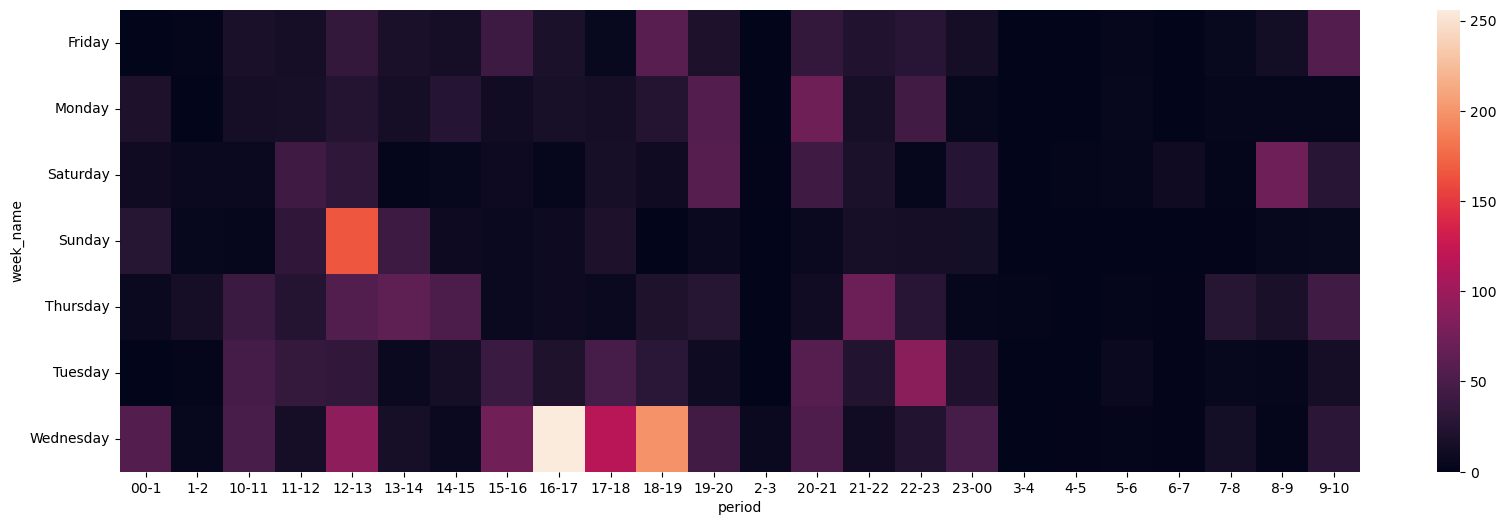

In [142]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='week_name',columns='period',values='Message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()